# **Problem statement: Understanding customer profile for Aerofit Treadmills**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/aerofit_treadmill.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# **Basic structure & characteristics of the dataset**

**Shape of data**

In [3]:
df.shape

(180, 9)

**Information on dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Number of null values**

In [5]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Basic statistics of data**

In [6]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# **Value Counts and Unique Attributes**

**Categorical columns**

In [7]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Continuous columns**

In [10]:
df['Age'].nunique()

32

In [11]:
df['Education'].nunique()

8

In [12]:
df['Usage'].nunique()

6

In [13]:
df['Fitness'].nunique()

5

In [14]:
df['Income'].nunique()

62

In [15]:
df['Miles'].nunique()

37

# **EDA**

## **Univariate Analysis**

### **Categorical variables (along with Marginal Probability)**

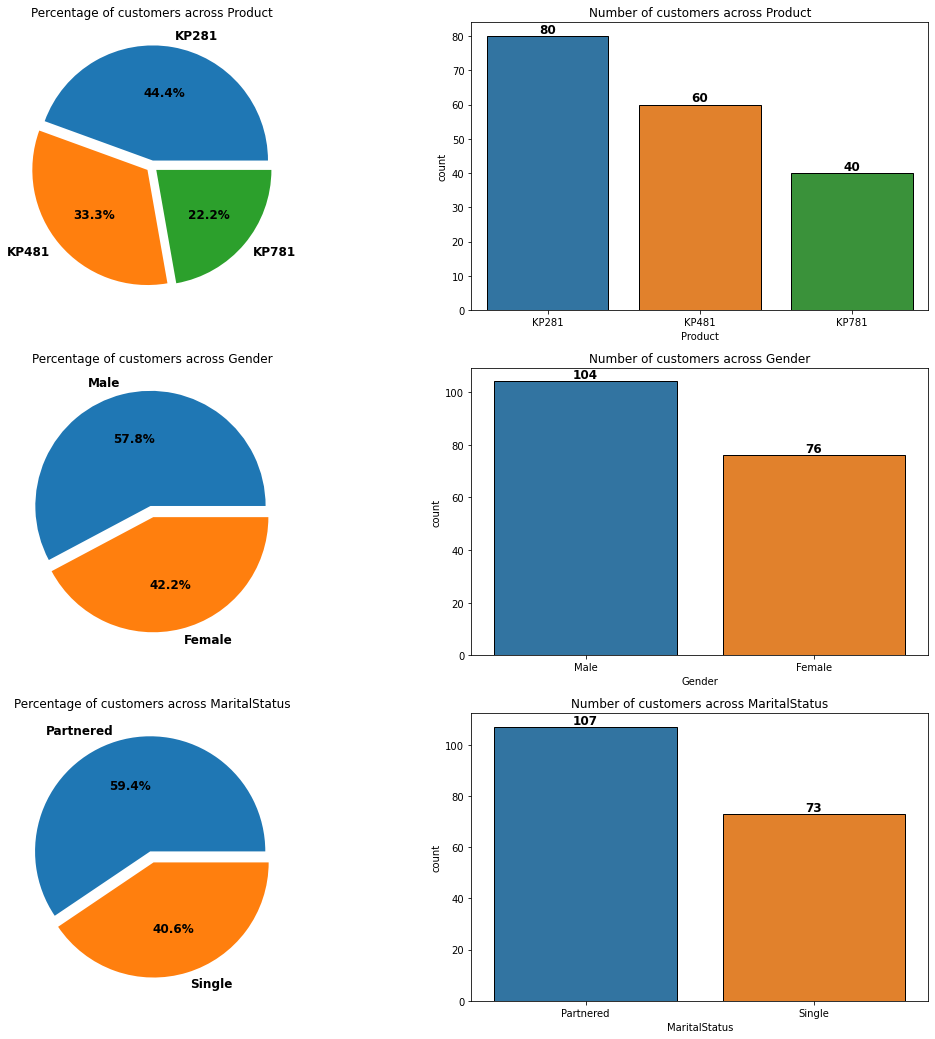

In [16]:
cat_features = ['Product', 'Gender', 'MaritalStatus']
fig = plt.figure(figsize=(18, 18))
id = 1
for feature in cat_features:
    plt.subplot(3, 2, id)
    plt.pie(df[feature].value_counts(), labels = df[feature].value_counts().index, explode = (0.05, )*len(df[feature].value_counts()), 
        autopct='%.1f%%', textprops = {'fontweight': 'bold', 'fontsize': 12})
    plt.title(f'Percentage of customers across {feature}', fontsize=12)
    plt.subplot(3, 2, id+1)
    f = sns.countplot(data=df, x=feature, edgecolor='black', order=df[feature].value_counts().index)
    for item in f.containers:
        f.bar_label(item, fontsize=12, fontweight='bold')
    plt.title(f'Number of customers across {feature}', fontsize=12)
    id += 2

*Observations:*

- Treadmills sold by Aerofit: We have a total of 3 treadmills
    - KP281: 44.4% 
    - KP481: 33.3%
    - KP781: 22.2%
- Customer Gender
    - Males: 57.8%
    - Females: 42.2%
- Customer Marital Status
    - Partnered customers: 59.4%
    - Single customers: 40.6%

### **Continuous variables (Histograms & Outlier Treatment)**

In [17]:
# Continuous features:
cont_features = {'Age':3 , 'Education':2, 'Usage':1, 'Fitness':1, 'Income':10000, 'Miles':30}

#### **Histogram**

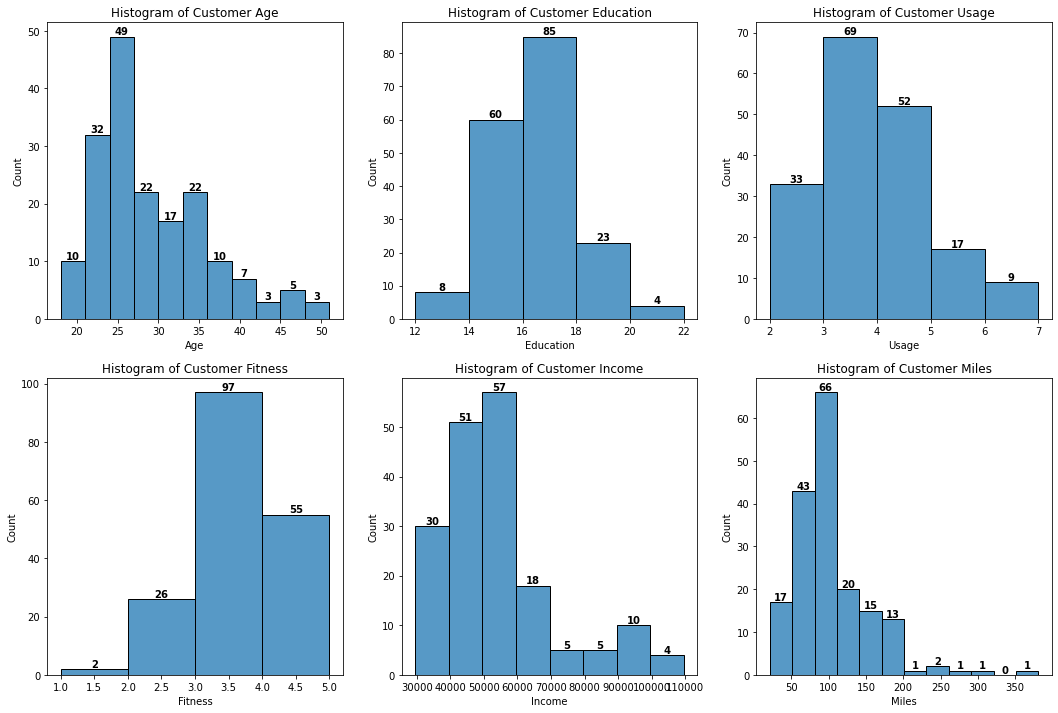

In [18]:
fig = plt.figure(figsize=(18, 12))
id = 1
for feature in cont_features:
    plt.subplot(2, 3, id)
    f= sns.histplot(df[feature], binwidth=cont_features[feature])
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold')
    plt.title(f'Histogram of Customer {feature}', fontsize=12)
    id += 1
plt.show()

*Observations:*

- Customer Age
    - Majority of the customers lie between 20-35 in their age
- Customer Education
    - Majority of the customers have 14-17 years in their education
- Customer Usage
    - Majority of the customers thought that they would use the treadmill 3-4 times per week
- Customer Fitness
    - Majority of the customers rated themselves a 3 (Average) in Fitness
- Customer Income
    - Majority of the customers have an annual income in between 30000-70000 USD
- Customer Miles
    - Majority of the customers thought that they would walk/run on the treadmill for 50-110 miles

#### **Box-plots and Outlier Treatment**

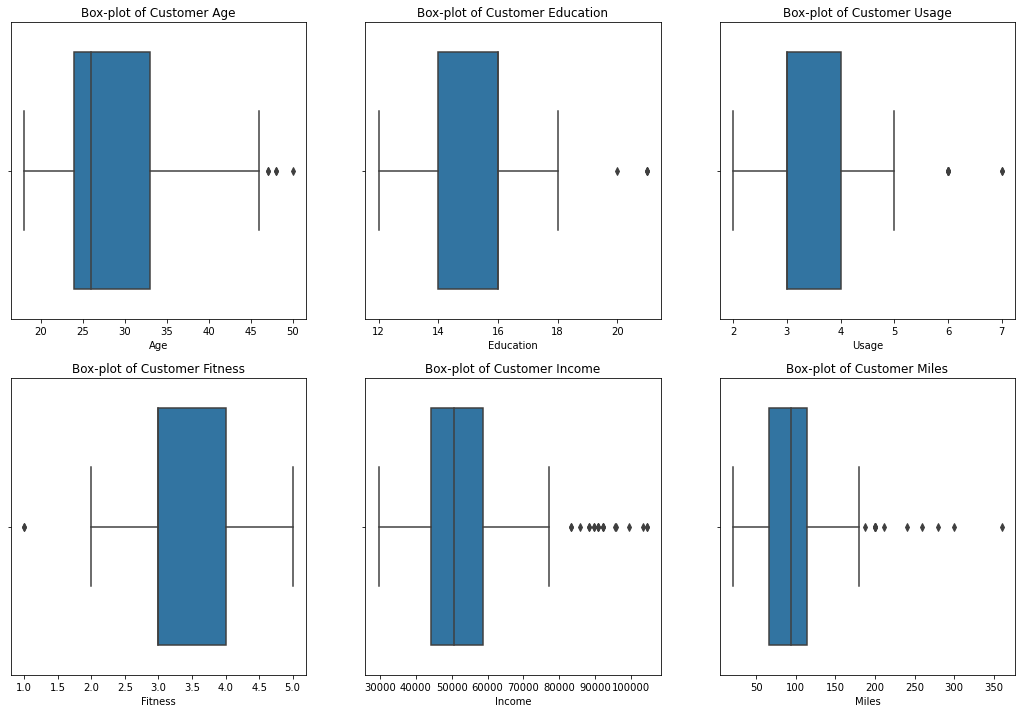

In [19]:
fig = plt.figure(figsize=(18, 12))
id = 1
for feature in cont_features:
    plt.subplot(2, 3, id)
    sns.boxplot(x=df[feature])
    plt.title(f'Box-plot of Customer {feature}', fontsize=12)
    id += 1
plt.show()

In [20]:
# Detecting outliers:
for feature in cont_features:
    median = np.percentile(df[feature], 50)
    iqr = np.percentile(df[feature], 75) - np.percentile(df[feature], 25)
    lower = np.percentile(df[feature], 25) - 1.5*iqr
    upper = np.percentile(df[feature], 75) + 1.5*iqr
    print(f'{feature}: Median={median}, Lower={lower}, Upper={upper}')

Age: Median=26.0, Lower=10.5, Upper=46.5
Education: Median=16.0, Lower=11.0, Upper=19.0
Usage: Median=3.0, Lower=1.5, Upper=5.5
Fitness: Median=3.0, Lower=1.5, Upper=5.5
Income: Median=50596.5, Lower=22144.875, Upper=80581.875
Miles: Median=94.0, Lower=-7.125, Upper=187.875


*Observations:*

- Customer Age
    - Median: 26 years
    - Outliers above: 46.5 years
- Customer Education
    - Median: 16 years
    - Outliers above: 19 years
- Customer Usage
    - Median: 3 times
    - Outliers above: 5.5 times
- Customer Fitness
    - Median: 3
    - Outliers below: 1.5
- Customer Income
    - Median: 50,596 USD
    - Outliers above: 80,582 USD
- Customer Miles
    - Median: 94 miles
    - Outliers above: 187.8 miles 

**Outlier Treatment: Setting outliers to the upper/lower whisker**

In [21]:
df_original = df.copy()

In [22]:
df.loc[df['Age'] > 46.5, 'Age'] = 46
df.loc[df['Education'] > 19, 'Education'] = 19
df.loc[df['Usage'] > 5.5, 'Usage'] = 5
df.loc[df['Fitness'] < 1.5, 'Fitness'] = 2
df.loc[df['Income'] > 80581, 'Income'] = 80581
df.loc[df['Miles'] > 187, 'Miles'] = 187

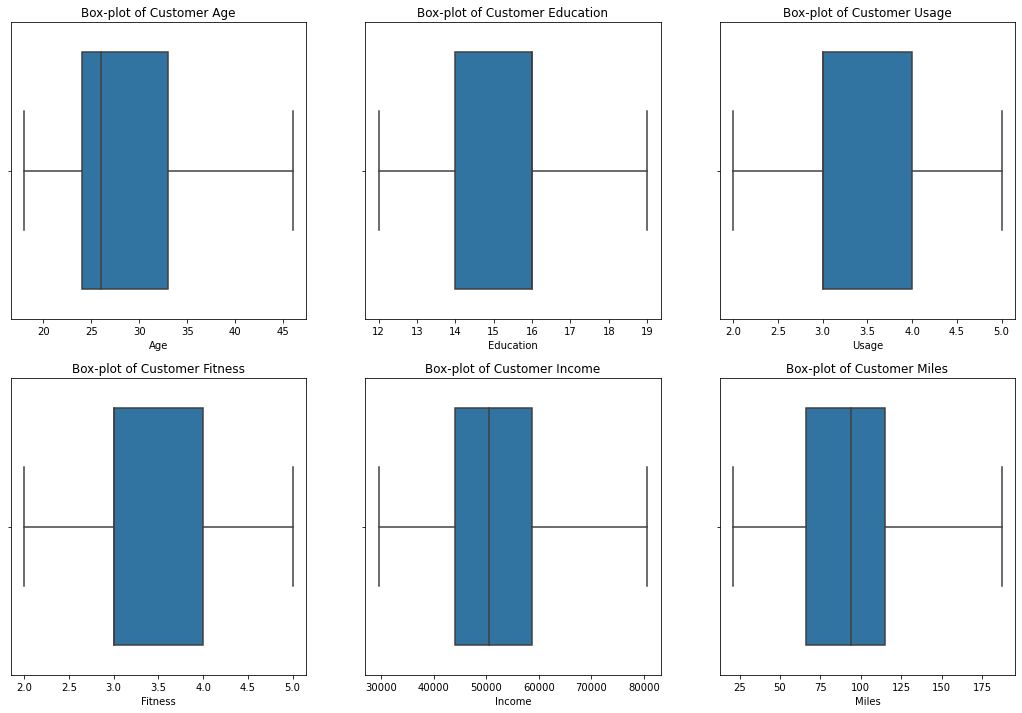

In [23]:
fig = plt.figure(figsize=(18, 12))
id = 1
for feature in cont_features:
    plt.subplot(2, 3, id)
    sns.boxplot(x=df[feature])
    plt.title(f'Box-plot of Customer {feature}', fontsize=12)
    id += 1
plt.show()

## **Bivariate Analysis**

### **Number of treadmills sold**
- Across Product and Gender
- Across Product and Marital Status

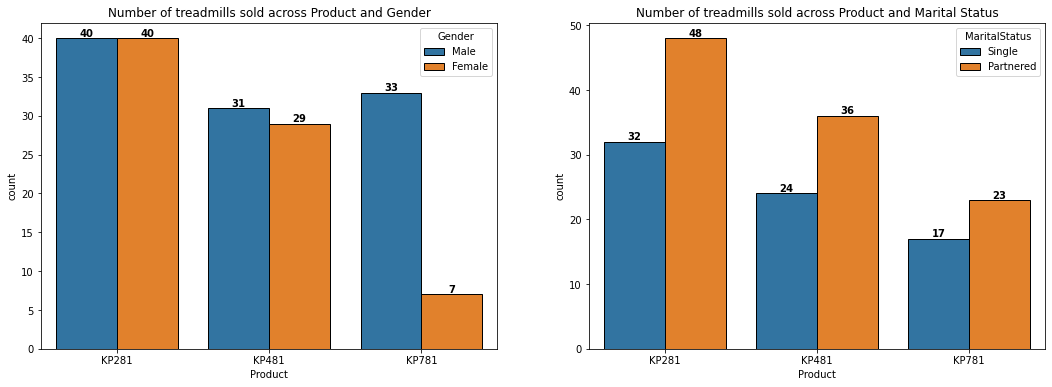

In [24]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
f = sns.countplot(data=df, x='Product', hue='Gender', edgecolor='black')
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.title('Number of treadmills sold across Product and Gender')
plt.subplot(1, 2, 2)
f = sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor='black')
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.title('Number of treadmills sold across Product and Marital Status')
plt.show()

Observations:
- Across Gender:
    - KP281 and KP481: equally bought b/w males & females
    - KP781: Most customers are male
- Across Marital status:
    - Partnered customers are more than single counterparts for all 3 treadmills

### **Studying the Continuous Features across Products**
- KDE plots
- Box plots
- Median of continuous features

#### **KDE and Box plots**

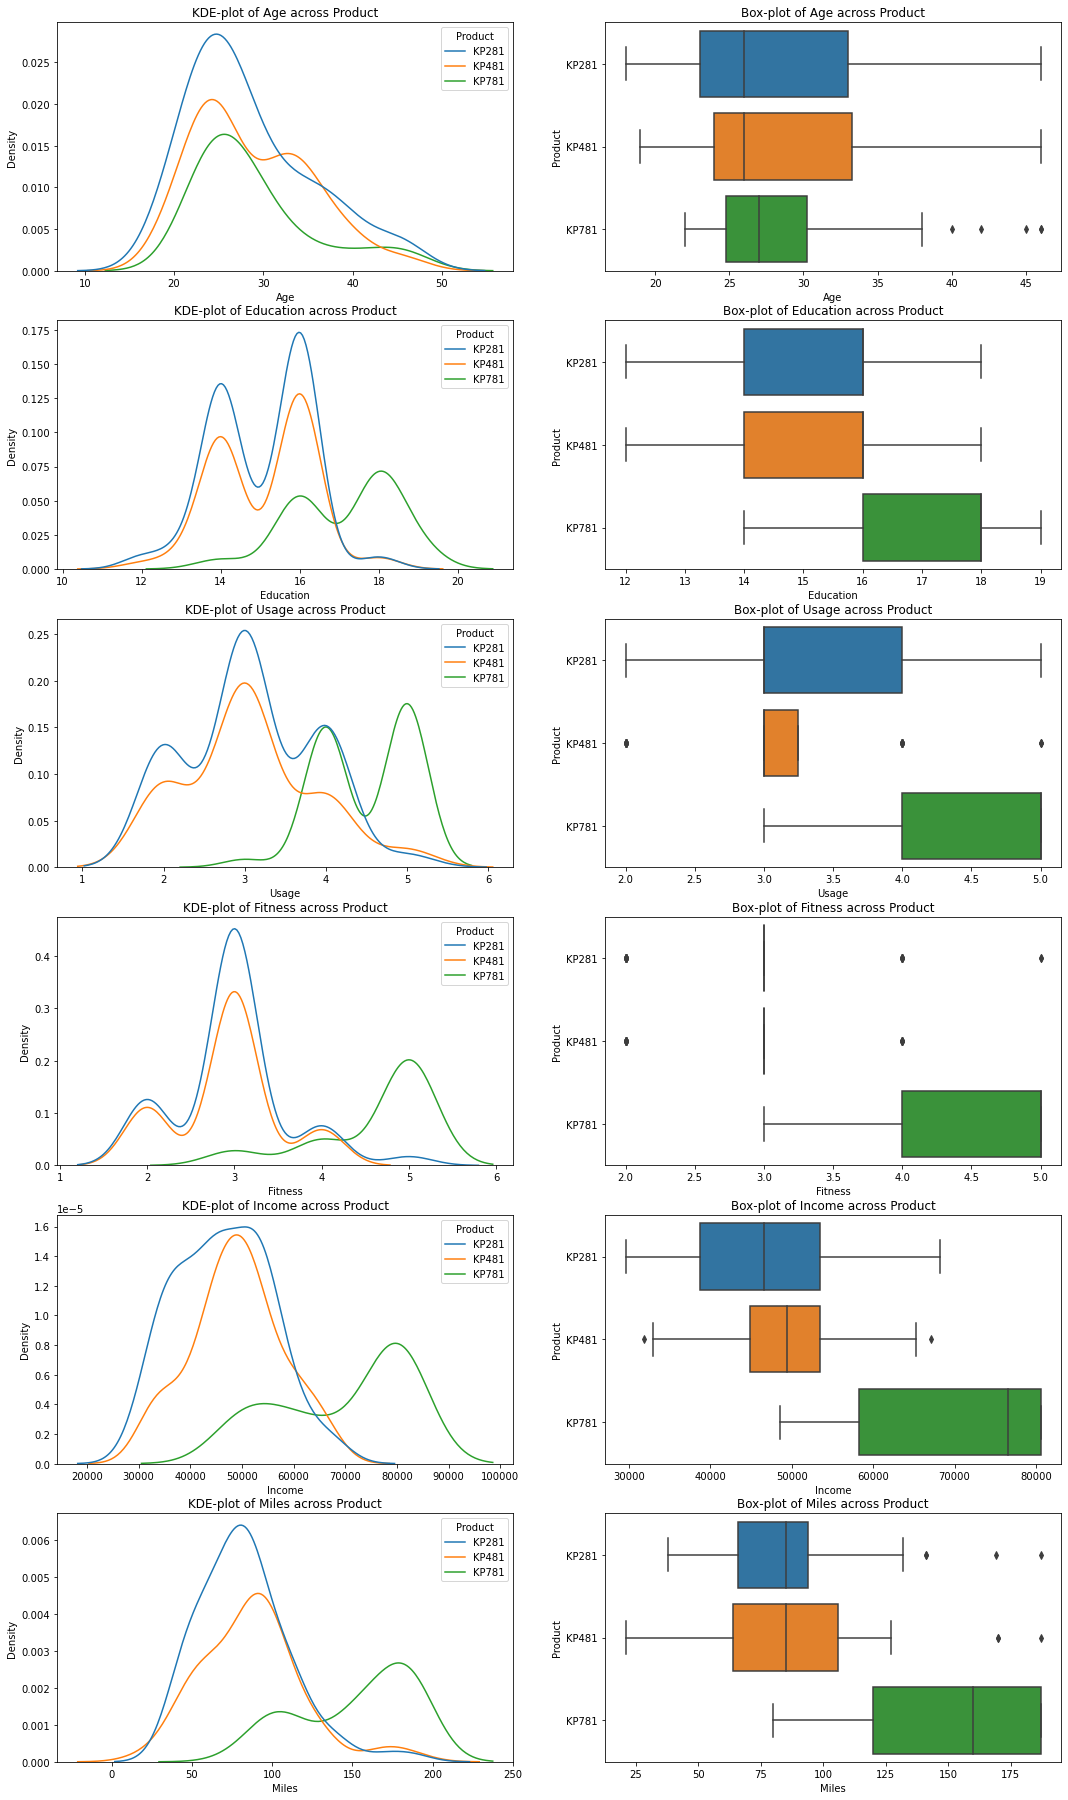

In [25]:
fig=plt.figure(figsize=(18, 32))
id = 1
for feature in cont_features:
    plt.subplot(6, 2, id)
    sns.kdeplot(df[feature], hue=df['Product'])
    plt.title(f'KDE-plot of {feature} across Product')
    plt.subplot(6, 2, id + 1)
    sns.boxplot(data=df, x=feature, y='Product')
    plt.title(f'Box-plot of {feature} across Product')
    
    id += 2
# fig.suptitle('Continuous features across Product', fontsize=14)
plt.show()

#### **Median of continuous columns**

In [26]:
cont_features_lst = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
df.groupby('Product')[cont_features_lst].agg('median')

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
KP281,26.0,16.0,3.0,3.0,46617.0,85.0
KP481,26.0,16.0,3.0,3.0,49459.5,85.0
KP781,27.0,18.0,5.0,5.0,76568.5,160.0


*Observations:*

1. From KDEplots: The features which impact the choice of buying a specific product are: 
    - Education, Usage, Fitness, Income and Miles
2. Given that the products in question are fitness products, the top features which affect the choice of buying would be: 
    - Income
    - Fitness
    - Usage
    - Miles
3. We observe that KP281 and KP481 are similar in many ways when it comes to the customer profile (as per the features shown above)
4. KP781 differs from the other 2 products substantially when it comes to the customer Education, Usage, Fitness, Income and Miles

---------------------------------------------------------------------------------------------------------------------------------------
- Age:
    - The median age across products is roughly the same
- Education:
    - KP281, KP481: The median number of years in education is 16
    - KP781: The median number of years in education is 18
- Usage:
    - KP281: The median usage is 3 times per week, some customers have reported other usages as well
    - KP481: All the customers reported their expected usage as 3 times a week barring a few
    - KP781: The median usage is 5 times per week
- Fitness:
    - KP281, KP481: The median fitness is 3 times per week, some customers have reported other usages as well
    - KP781: The median fitness is 5 (customers already think they are very fit and hence they probably invested in an expensive product)
- Income:
    - KP281: The median customer income is 46.6K USD
    - KP481: The median customer income is 49.5K USD
    - KP781: The median customer income is 76.6K USD, substantially higher than the other 2 products
- Miles:
    - KP281, KP481: The median miles customer expects to walk/run is 85
    - KP781: The median miles customer expects to walk/run is 160, almost 2X of the other 2

## **Multivariate Analysis**

In [27]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.296565,0.015552,0.058312,0.542205,0.024419
Education,0.296565,1.000000,0.391276,0.439050,0.646931,0.362209
Usage,0.015552,0.391276,1.000000,0.660556,0.460975,0.778043
Fitness,0.058312,0.439050,0.660556,1.000000,0.522897,0.832547
Income,0.542205,0.646931,0.460975,0.522897,1.000000,0.506504
Miles,0.024419,0.362209,0.778043,0.832547,0.506504,1.000000


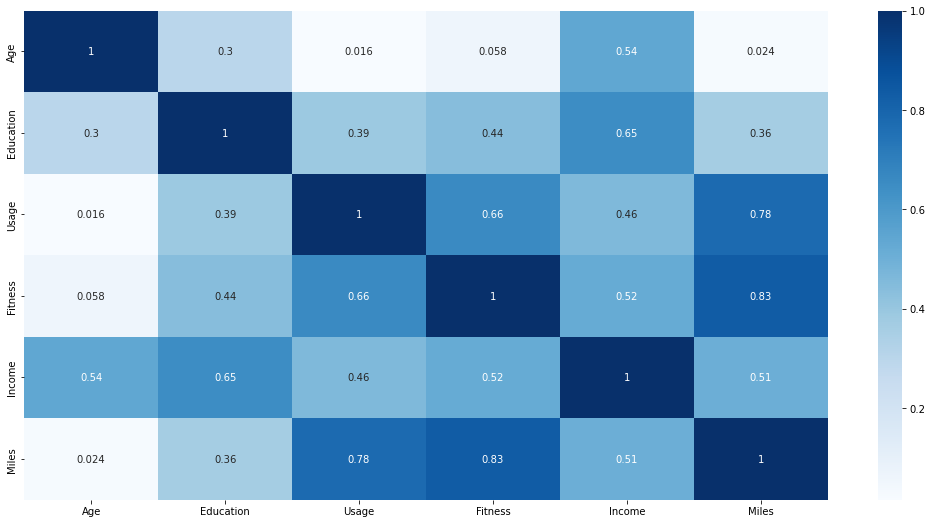

In [28]:
plt.figure(figsize=(18, 9))
sns.heatmap(data=df.corr(), cmap='Blues', annot=True)
plt.show()

*Observations:*

The feature combinations which have high correlation are:
- Age, Income
- Education, Income
- Usage, Fitness
- Usage, Miles
- Fitness, Income
- Fitness, Miles
- Income, Miles

We must keep in mind that we are trying to create a customer profile for the different treadmill products. Keeping that objective in mind, we realise that some of the above pairs may not be relevant from the context of business. Thus we do not explore those. However, we will look in depth at the following:

- Age vs Income
- Usage vs Fitness
- Usage vs Miles
- Fitness vs Miles

In [29]:
gender_marStat = {'Gender': ['Male', 'Female'], 'MaritalStatus': ['Single', 'Partnered']}

### **Age vs Income**

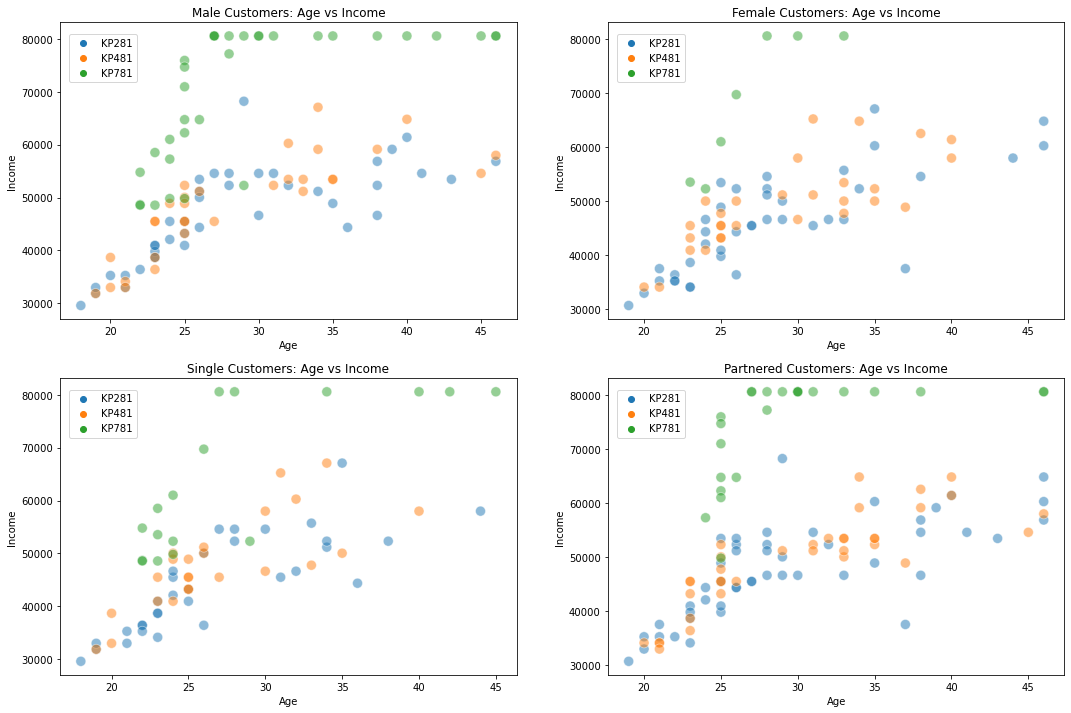

In [30]:
fig=plt.figure(figsize=(18, 12))
id = 1
for feature in gender_marStat:

    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2, 2, id)
    f = sns.scatterplot(data = df_filter, x = 'Age', y = 'Income', hue='Product', s=100, alpha=0.5)
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Age vs Income')
    
    df_filter = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2, 2, id+1)
    f = sns.scatterplot(data = df_filter, x = 'Age', y = 'Income', hue='Product', s=100, alpha=0.5)
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Age vs Income')
    
    id += 2

*Observations:*

- We see a positive correlation b/w Age and Income
- This is to be expected since the income of a person usually increases as he keeps working in his job
- We also see that people whose income > 50,000 USD tend to go for the KP781
- We see a lot of data points where income = 80,000 USD (This is because of the oulier treatment)
    - Number of males who earn >= 80,000 USD is more than that of females

### **Usage vs Fitness**

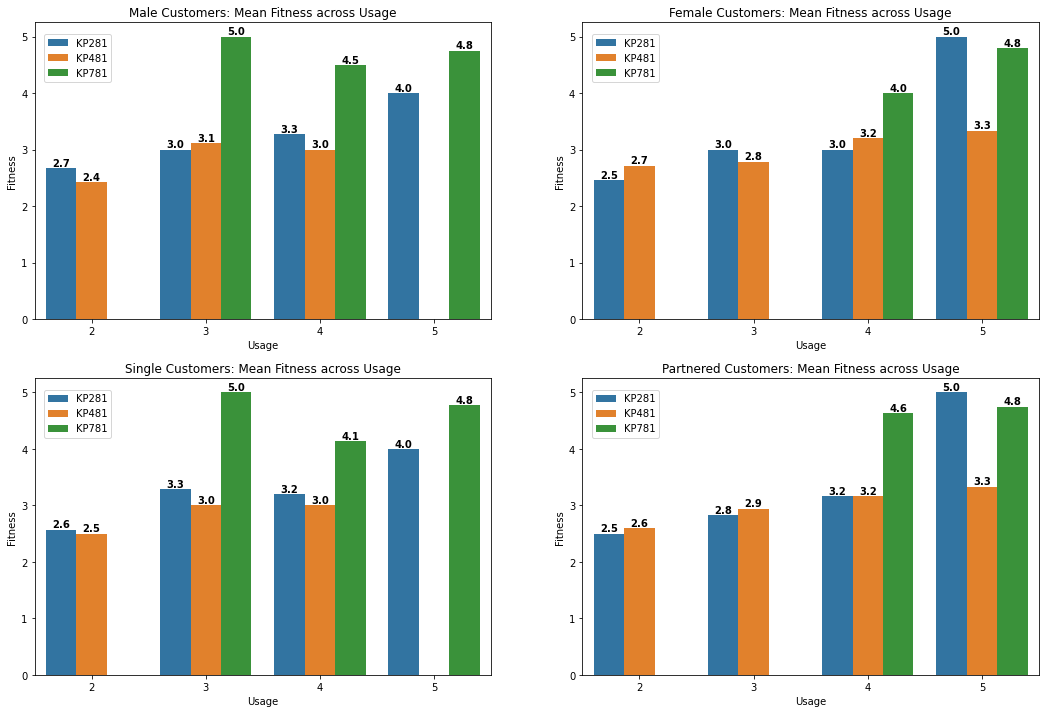

In [31]:
fig=plt.figure(figsize=(18, 12))
id = 1
for feature in gender_marStat:

    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2, 2, id)
    f = sns.barplot(data = df_filter, x = 'Usage', y = 'Fitness', hue='Product', estimator=np.mean, ci=None)
    for item in f.containers:
        f.bar_label(item, fmt='%.1f', fontsize=10, fontweight='bold')
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Mean Fitness across Usage')
    
    df_filter = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2, 2, id+1)
    f = sns.barplot(data = df_filter, x = 'Usage', y = 'Fitness', hue='Product', estimator=np.mean, ci=None)
    for item in f.containers:
        f.bar_label(item, fmt='%.1f', fontsize=10, fontweight='bold')
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Mean Fitness across Usage')
    
    id += 2

*Observations:*

- There is a positive correlation b/w usage and fitness
- Usally people with higher usage have a higher mean fitness (again this is not surprising)
- We also observe that people who have opted for the KP781 are more fit

### **Usage vs Miles**

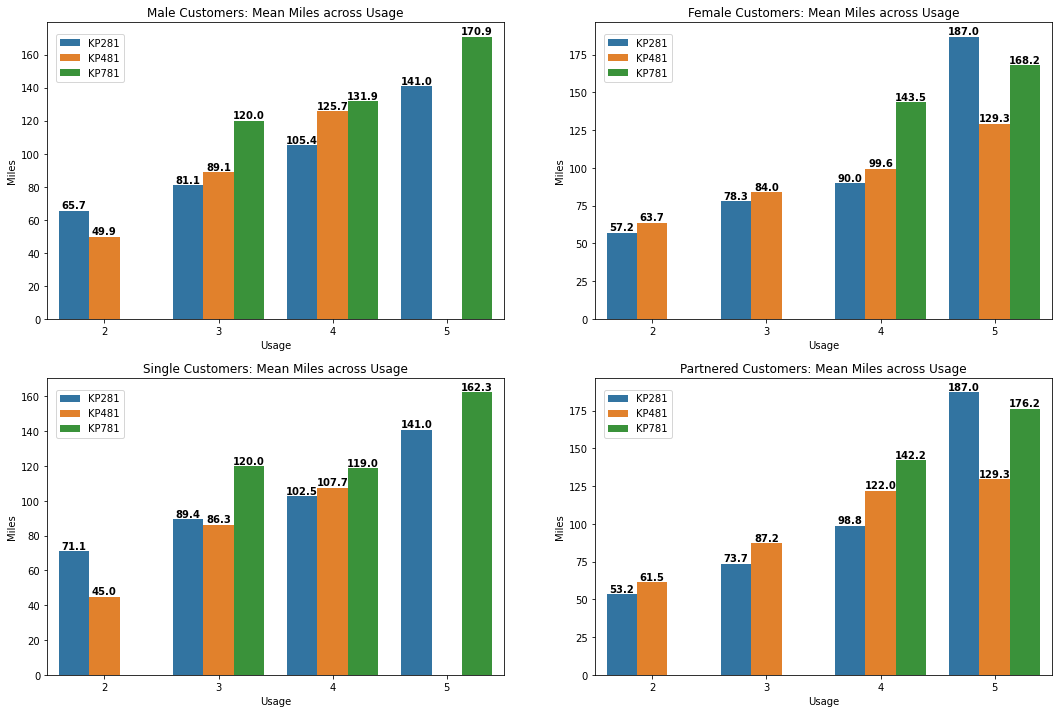

In [32]:
fig=plt.figure(figsize=(18, 12))
id = 1
for feature in gender_marStat:

    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2, 2, id)
    f = sns.barplot(data = df_filter, x = 'Usage', y = 'Miles', hue='Product', estimator=np.mean, ci=None)
    for item in f.containers:
        f.bar_label(item, fmt='%.1f', fontsize=10, fontweight='bold')
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Mean Miles across Usage')
    
    df_filter = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2, 2, id+1)
    f = sns.barplot(data = df_filter, x = 'Usage', y = 'Miles', hue='Product', estimator=np.mean, ci=None)
    for item in f.containers:
        f.bar_label(item, fmt='%.1f', fontsize=10, fontweight='bold')
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Mean Miles across Usage')
    
    id += 2

*Observations:*

- There is a positive correlation b/w usage and miles
- Usally people with higher usage have a higher mean miles (again this is to be expected)
- We also observe that the mean miles of male customers is higher than that of female customers
- Also single customers have higher mean miles than partnered customers

### **Fitness vs Miles**

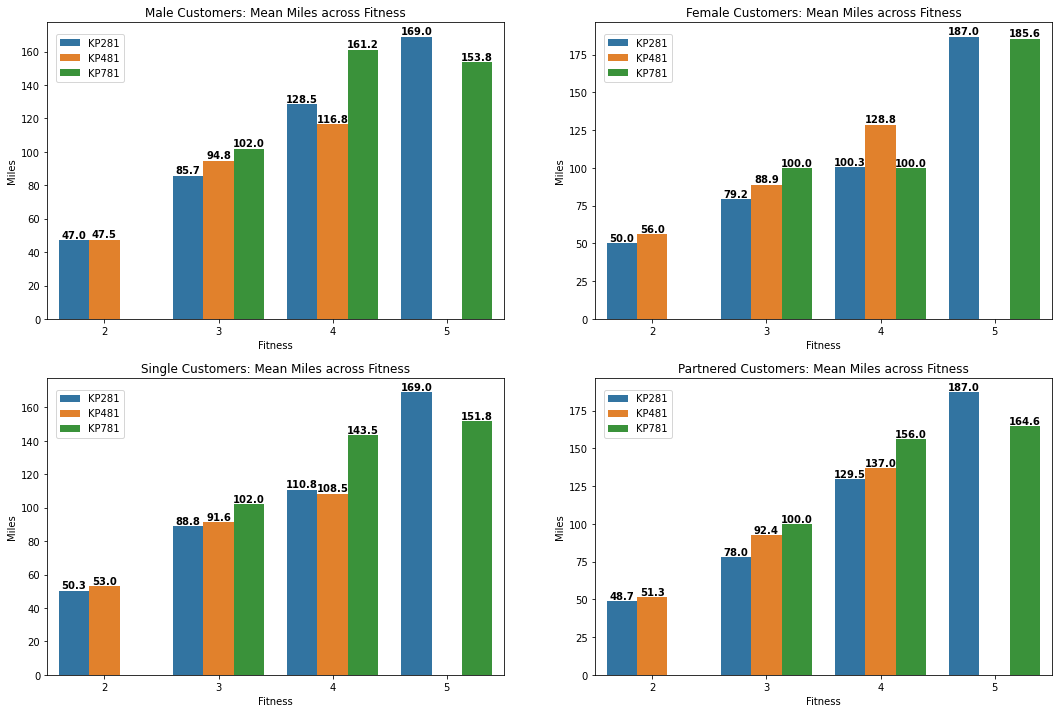

In [33]:
fig=plt.figure(figsize=(18, 12))
id = 1
for feature in gender_marStat:

    df_filter = df.loc[df[feature] == gender_marStat[feature][0]]
    plt.subplot(2, 2, id)
    f = sns.barplot(data = df_filter, x = 'Fitness', y = 'Miles', hue='Product', estimator=np.mean, ci=None)
    for item in f.containers:
        f.bar_label(item, fmt='%.1f', fontsize=10, fontweight='bold')
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][0]} Customers: Mean Miles across Fitness')
    
    df_filter = df.loc[df[feature] == gender_marStat[feature][1]]
    plt.subplot(2, 2, id+1)
    f = sns.barplot(data = df_filter, x = 'Fitness', y = 'Miles', hue='Product', estimator=np.mean, ci=None)
    for item in f.containers:
        f.bar_label(item, fmt='%.1f', fontsize=10, fontweight='bold')
    plt.legend(loc=(0.02, 0.8))
    plt.title(f'{gender_marStat[feature][1]} Customers: Mean Miles across Fitness')
    
    id += 2

*Observations:*

- There is a positive correlation b/w fitness and miles
- Usally people with higher fitness have a higher mean miles (again this is not surprising)

# **Customer Profiling & Conditional Probabilities**

## **Converting continuous columns into categorical columns**
- Age
- Income
- Miles

In [34]:
df_profile = df.copy()

In [35]:
age_33 = np.percentile(df['Age'], 33)
age_67 = np.percentile(df['Age'], 67)
income_33 = np.percentile(df['Income'], 33)
income_67 = np.percentile(df['Income'], 67)
miles_33 = np.percentile(df['Miles'], 33)
miles_67 = np.percentile(df['Miles'], 67)

**We split the the below columns into the following categories:**

- Age:
    - Below 25 years
    - 25-30 years
    - Above 30 years
- Income
    - Low : Below 45480 USD
    - Medium: (45480-54576) USD
    - High: Above 54576 USD
- Miles
    - Low: Below 80 miles
    - Medium: (80-106) miles
    - High: Above 106 miles

In [36]:
df_profile['Age_Category'] = pd.cut(df['Age'], bins=[df['Age'].min()-5, age_33-1, age_67, df['Age'].max()+5], labels=['Below_25', '25-30', 'Above_30'], right=True)
df_profile['Income_Category'] = pd.cut(df['Income'], bins=[df['Income'].min()-1000, income_33, income_67, df['Income'].max()+1000], labels=['Low', 'Medium', 'High'], right=True)
df_profile['Mile_Category'] = pd.cut(df['Miles'], bins=[df['Miles'].min()-10, miles_33, miles_67, df['Miles'].max()+10], labels=['Low', 'Medium', 'High'], right=True)

In [37]:
df_profile['Age_Category'].value_counts(normalize=True)

25-30       0.366667
Above_30    0.333333
Below_25    0.300000
Name: Age_Category, dtype: float64

In [38]:
df_profile['Income_Category'].value_counts(normalize=True)

Low       0.350000
Medium    0.344444
High      0.305556
Name: Income_Category, dtype: float64

In [39]:
df_profile['Mile_Category'].value_counts(normalize=True)

Medium    0.366667
Low       0.333333
High      0.300000
Name: Mile_Category, dtype: float64

In [40]:
df_profile.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category,Mile_Category
0,KP281,18,Male,14,Single,3,4,29562,112,Below_25,Low,High
1,KP281,19,Male,15,Single,2,3,31836,75,Below_25,Low,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Below_25,Low,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Below_25,Low,Medium
4,KP281,20,Male,13,Partnered,4,2,35247,47,Below_25,Low,Low


## **Product Across Customer Gender**

In [41]:
# Treadmills sold across Product and Gender
pd.crosstab(index=df_profile['Product'], columns=df_profile['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


**Conditional Probability**

In [42]:
print('P[Male/KP281]:', 40/80)
print('P[Female/KP281]:', 40/80)
print('-'*50)
print('P[Male/KP481]:', 31/60)
print('P[Female/KP481]:', 29/60)
print('-'*50)
print('P[Male/KP781]:', 33/40)
print('P[Female/KP781]:', 7/40)
print('-'*50)

P[Male/KP281]: 0.5
P[Female/KP281]: 0.5
--------------------------------------------------
P[Male/KP481]: 0.5166666666666667
P[Female/KP481]: 0.48333333333333334
--------------------------------------------------
P[Male/KP781]: 0.825
P[Female/KP781]: 0.175
--------------------------------------------------


*Observations:*

Across Gender:
- Both men and women are equally likely to buy KP281 and KP481
- Majority of the customer base for KP781 is male

## **Product Across Customer Marital Status**

In [43]:
# Treadmills sold across Product and Marital Status
pd.crosstab(index=df_profile['Product'], columns=df_profile['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


**Conditional Probability**

In [44]:
print('P[Single/KP281]:', 32/80)
print('P[Partnered/KP281]:', 48/80)
print('-'*50)
print('P[Single/KP481]:', 24/60)
print('P[Partnered/KP481]:', 36/60)
print('-'*50)
print('P[Single/KP781]:', 17/40)
print('P[Partnered/KP781]:', 23/40)
print('-'*50)

P[Single/KP281]: 0.4
P[Partnered/KP281]: 0.6
--------------------------------------------------
P[Single/KP481]: 0.4
P[Partnered/KP481]: 0.6
--------------------------------------------------
P[Single/KP781]: 0.425
P[Partnered/KP781]: 0.575
--------------------------------------------------


*Observations:*

Across Marital Status:
- Partnered customers outnumber single customers for all the products

## **Product Across both Customer Gender & Customer Marital Status**

In [45]:
pd.crosstab(index=df['Product'], columns=[df['Gender'], df['MaritalStatus']], margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

**Conditional Probability**

In [46]:
print('P[Male & Single/KP281]:', 19/80)
print('P[Male & Partnered/KP281]:', 21/80)
print('P[Female & Single/KP281]:', 13/80)
print('P[Female & Partnered/KP281]:', 27/80)
print('-'*50)
print('P[Male & Single/KP481]:', 10/60)
print('P[Male & Partnered/KP481]:', 21/60)
print('P[Female & Single/KP481]:', 14/60)
print('P[Female & Partnered/KP481]:', 15/60)
print('-'*50)
print('P[Male & Single/KP781]:', 14/40)
print('P[Male & Partnered/KP781]:', 19/40)
print('P[Female & Single/KP781]:', 3/40)
print('P[Female & Partnered/KP781]:', 4/40)
print('-'*50)

P[Male & Single/KP281]: 0.2375
P[Male & Partnered/KP281]: 0.2625
P[Female & Single/KP281]: 0.1625
P[Female & Partnered/KP281]: 0.3375
--------------------------------------------------
P[Male & Single/KP481]: 0.16666666666666666
P[Male & Partnered/KP481]: 0.35
P[Female & Single/KP481]: 0.23333333333333334
P[Female & Partnered/KP481]: 0.25
--------------------------------------------------
P[Male & Single/KP781]: 0.35
P[Male & Partnered/KP781]: 0.475
P[Female & Single/KP781]: 0.075
P[Female & Partnered/KP781]: 0.1
--------------------------------------------------




*Observations:*

Across Gender & Marital Status:
- For KP281: Partnered Females are most likely to buy
- For KP481: Partnered Males are most likely to buy
- For KP781: Males are most likely to buy, females have very less probability of buying it

## **Product Across Customer Age Category**

In [47]:
pd.crosstab(index=df_profile['Product'], columns=df_profile['Age_Category'], margins=True)

Age_Category,Below_25,25-30,Above_30,All
Product,,,,
KP281,27,28,25,80
KP481,17,18,25,60
KP781,10,20,10,40
All,54,66,60,180


In [48]:
print('P[Age:Below_25/KP281]:', 27/80)
print('P[Age:25-30/KP281]:', 28/80)
print('P[Age:Above_30/KP281]:', 25/80)
print('-'*50)
print('P[Age:Below_25/KP481]:', 17/60)
print('P[Age:25-30/KP481]:', 18/60)
print('P[Age:Above_30/KP481]:', 25/60)
print('-'*50)
print('P[Age:Below_25/KP781]:', 10/40)
print('P[Age:25-30/KP781]:', 20/40)
print('P[Age:Above_30/KP781]:', 10/40)
print('-'*50)

P[Age:Below_25/KP281]: 0.3375
P[Age:25-30/KP281]: 0.35
P[Age:Above_30/KP281]: 0.3125
--------------------------------------------------
P[Age:Below_25/KP481]: 0.2833333333333333
P[Age:25-30/KP481]: 0.3
P[Age:Above_30/KP481]: 0.4166666666666667
--------------------------------------------------
P[Age:Below_25/KP781]: 0.25
P[Age:25-30/KP781]: 0.5
P[Age:Above_30/KP781]: 0.25
--------------------------------------------------


*Observations:*

- For KP281: The probability of customer falling in each age bucket is equally likely
- For KP481: The probability of customer falling in the Above_30 Age ategory is slightly higher than the other 2 categories
- For KP781: Customers falling in the age bracket [25, 30] have the maximum probability of buying it

## **Product Across Customer Usage**

In [49]:
pd.crosstab(index=df_profile['Product'], columns=df_profile['Usage'], margins=True)

Usage,2,3,4,5,All
Product,,,,,
KP281,19,37,22,2,80
KP481,14,31,12,3,60
KP781,0,1,18,21,40
All,33,69,52,26,180


In [50]:
print('P[Usage:2/KP281]:', 19/80)
print('P[Usage:3/KP281]:', 37/80)
print('P[Usage:4/KP281]:', 22/80)
print('P[Usage:5_and_Above/KP281]:', 5/80)
print('-'*50)
print('P[Usage:2/KP481]:', 14/60)
print('P[Usage:3/KP481]:', 31/60)
print('P[Usage:4/KP481]:', 12/60)
print('P[Usage:5_and_Above/KP481]:', 3/60)
print('-'*50)
print('P[Usage:2/KP781]:', 0/40)
print('P[Usage:3/KP781]:', 1/40)
print('P[Usage:4/KP781]:', 18/40)
print('P[Usage:5_and_Above/KP781]:', 21/40)
print('-'*50)

P[Usage:2/KP281]: 0.2375
P[Usage:3/KP281]: 0.4625
P[Usage:4/KP281]: 0.275
P[Usage:5_and_Above/KP281]: 0.0625
--------------------------------------------------
P[Usage:2/KP481]: 0.23333333333333334
P[Usage:3/KP481]: 0.5166666666666667
P[Usage:4/KP481]: 0.2
P[Usage:5_and_Above/KP481]: 0.05
--------------------------------------------------
P[Usage:2/KP781]: 0.0
P[Usage:3/KP781]: 0.025
P[Usage:4/KP781]: 0.45
P[Usage:5_and_Above/KP781]: 0.525
--------------------------------------------------


*Observations:*

- For KP281, KP481: 
    - The probability of customer usage being 3 times a week is the highest
    - Customer usage being 4 (and above) times a week is really low for these products
- For KP781: 
    - Customers whose usage is 4 (and above) times a week form the main customer base
    - Customers with low/average usage (less than 4 times a week) have very less probability of buying this

## **Product Across Customer Fitness**

In [51]:
pd.crosstab(index=df_profile['Product'], columns=df_profile['Fitness'], margins=True)

Fitness,2,3,4,5,All
Product,,,,,
KP281,15,54,9,2,80
KP481,13,39,8,0,60
KP781,0,4,7,29,40
All,28,97,24,31,180


In [52]:
print('P[Fitness:2_and_Below/KP281]:', 15/80)
print('P[Fitness:3/KP281]:', 54/80)
print('P[Fitness:4/KP281]:', 9/80)
print('P[Fitness:5/KP281]:', 2/80)
print('-'*50)
print('P[Fitness:2_and_Below/KP481]:', 13/60)
print('P[Fitness:3/KP481]:', 39/60)
print('P[Fitness:4/KP481]:', 8/60)
print('P[Fitness:5/KP481]:', 0/60)
print('-'*50)
print('P[Fitness:2_and_Below/KP781]:', 0/40)
print('P[Fitness:3/KP781]:', 4/40)
print('P[Fitness:4/KP781]:', 7/40)
print('P[Fitness:5/KP781]:', 29/40)
print('-'*50)

P[Fitness:2_and_Below/KP281]: 0.1875
P[Fitness:3/KP281]: 0.675
P[Fitness:4/KP281]: 0.1125
P[Fitness:5/KP281]: 0.025
--------------------------------------------------
P[Fitness:2_and_Below/KP481]: 0.21666666666666667
P[Fitness:3/KP481]: 0.65
P[Fitness:4/KP481]: 0.13333333333333333
P[Fitness:5/KP481]: 0.0
--------------------------------------------------
P[Fitness:2_and_Below/KP781]: 0.0
P[Fitness:3/KP781]: 0.1
P[Fitness:4/KP781]: 0.175
P[Fitness:5/KP781]: 0.725
--------------------------------------------------


*Observations:*

- For KP281, KP481: 
    - The probability of customer fitness being 3 is the highest followed by being 2 and below
- For KP781: 
    - Customers whose fitness is 5 have the highest probability of buying this product

## **Product Across Customer Income Category**

In [53]:
pd.crosstab(index=df_profile['Product'], columns=df_profile['Income_Category'], margins=True)

Income_Category,Low,Medium,High,All
Product,,,,
KP281,39,30,11,80
KP481,24,24,12,60
KP781,0,8,32,40
All,63,62,55,180


In [54]:
print('P[Income:Low/KP281]:', 39/80)
print('P[Income:Medium/KP281]:', 30/80)
print('P[Income:High/KP281]:', 11/80)
print('-'*50)
print('P[Income:Low/KP481]:', 24/60)
print('P[Income:Medium/KP481]:', 24/60)
print('P[Income:High/KP481]:', 12/60)
print('-'*50)
print('P[Income:Low/KP781]:', 0/40)
print('P[Income:Medium/KP781]:', 8/40)
print('P[Income:High/KP781]:', 32/40)
print('-'*50)

P[Income:Low/KP281]: 0.4875
P[Income:Medium/KP281]: 0.375
P[Income:High/KP281]: 0.1375
--------------------------------------------------
P[Income:Low/KP481]: 0.4
P[Income:Medium/KP481]: 0.4
P[Income:High/KP481]: 0.2
--------------------------------------------------
P[Income:Low/KP781]: 0.0
P[Income:Medium/KP781]: 0.2
P[Income:High/KP781]: 0.8
--------------------------------------------------


*Observations:*

- For KP281, KP481: 
    - Customers with Low & Medium incomes form the main customer base
- For KP781: 
    - Customers with High income form the main customer base

## **Product Across Customer Mile Category**

In [55]:
pd.crosstab(index=df_profile['Product'], columns=df_profile['Mile_Category'], margins=True)

Mile_Category,Low,Medium,High,All
Product,,,,
KP281,38,27,15,80
KP481,21,31,8,60
KP781,1,8,31,40
All,60,66,54,180


In [56]:
print('P[Mile:Low/KP281]:', 38/80)
print('P[Mile:Medium/KP281]:', 27/80)
print('P[Mile:High/KP281]:', 15/80)
print('-'*50)
print('P[Mile:Low/KP481]:', 21/60)
print('P[Mile:Medium/KP481]:', 31/60)
print('P[Mile:High/KP481]:', 8/60)
print('-'*50)
print('P[Mile:Low/KP781]:', 1/40) 
print('P[Mile:Medium/KP781]:', 8/40)
print('P[Mile:High/KP781]:', 31/40)
print('-'*50)

P[Mile:Low/KP281]: 0.475
P[Mile:Medium/KP281]: 0.3375
P[Mile:High/KP281]: 0.1875
--------------------------------------------------
P[Mile:Low/KP481]: 0.35
P[Mile:Medium/KP481]: 0.5166666666666667
P[Mile:High/KP481]: 0.13333333333333333
--------------------------------------------------
P[Mile:Low/KP781]: 0.025
P[Mile:Medium/KP781]: 0.2
P[Mile:High/KP781]: 0.775
--------------------------------------------------


*Observations:*

- For KP281:
    - THe probability of Cutomer miles being Low is the highest and being High is the lowest
    - There is a strong declining trend
- For KP481: 
    - THe probability of Cutomer miles being Medium is the highest
    - The trend is quite different from what we observe ffor KP281
- For KP781: 
    - Customers whose miles are High form the main customer base

## **Summary of customer profile**

**For KP281:**
- Both men and women are eqaully likely to buy this.
- Partnered customers are more than single customers.
- If we get really specific, partnered females form the largest customer base for this product (almost 34%).
- Customers from all age groups are equally likely to buy this, there is no age bias.
- Customers whose usage is between 2-4 times a week buy this product, very few with usage 5 (and more) times a week prefer this.
- Almost 70% of the customers who bought this product rated themselves a 3 in fitness, very few bought this product whose fitness was 4 and above.
- The majority (87%) of the custmomers fall in the:
    - Low Income bracket (49% below 45480 USD) 
    - Medium Income bracket (38% b/w 45480-54576 USD)
- The majority (82%) of the custmomers fall in the:
    - Low Miles bracket (48% below 80 miles) 
    - Medium Miles bracket (34% in 80-106 miles)

**For KP481:**
- Both men and women are eqaully likely to buy this.
- Partnered customers are more than single customers.
- If we get really specific, partnered males form the largest customer base for this product (almost 35%).
- Customers who are above 30 form the largest customer base (almost 42%). The rest 58% is evenly split b/w the other 2 age categories.
- Customers whose usage is between 2-4 times a week buy this product, very few with usage 5 (and more) times a week prefer this.
- 65% of the customers who bought this product rated themselves a 3 in fitness, very few bought this product whose fitness was 4 and above.
- The majority (80%) of the custmomers fall in the:
    - Low Income bracket (40% below 45480 USD) 
    - Medium Income bracket (40% b/w 45480-54576 USD)
- The majority (87%) of the custmomers fall in the:
    - Medium Miles bracket (52% in 80-106 miles) 
    - Low Miles bracket (35% below 80 miles)

**For KP781:**
- Mostly men buy this (almost 83%).
- Partnered customers are more than single customers.
- Customers who are b/w 25-30 years form the largest customer base (50%). The rest 50% is evenly split b/w the other 2 age categories.
- Customers whose usage is 4 or more times a week buy this product, very few with usage less than 4 times a week prefer this.
- 73% of the customers who bought this product rated themselves a 5 in fitness, very few bought this product whose fitness was 3 and below.
- The majority (80%) of the custmomers fall in the High Income bracket (above 54576 USD) 
    - There are no customers from the Low Income bracket(below 45480 USD)
- The majority (98%) of the custmomers fall in the: 
    - High Miles bracket (78% above 106 miles) 
    - Medium Miles bracket (20% in 80-106 miles)

# **Business Insights & Recommendations:**

### **Insights:**

1. Aerofit has 3 treadmills: KP281, KP481 & KP781.
    - KP281 id the most sold product , followed by KP481 in the 2nd place and KP781 in the 3rd place.
2. Expected revenue generated by selling 1 Aerofit treadmill:
    - (KP281_price * P[KP281]) + (KP481_price * P[KP481]) + (KP781_price * P[KP781]) = 1500\*0.444  + 1750\*0.333 + 2500\*0.222 = 1804 USD
3. Male customers are more than female customers. Also partnered customers are more than single customers.
4. The target customer across the 3 treadmills lies somewhere between 20-35 years in age.
5. Most of the customers' annual income lie in the range 30000-70000 USD.
6. Customer profile for KP281 & KP481 are almost the same.
    - This is to be expected since the price difference b/w the 2 products is very less
    - However some of the key difference b/w the profiles for KP281 and KP481 are:
        - Largest customer base: Partnered females for KP281, partnered males for KP481
        - Age of customers: customers across all age groups buy KP281 while KP481 is more preferred by those who are above 30
        - If we look at the number of customers in the Low Income bracket, we have: 
            - 49% of KP281 buyers are in the Low Income bracket
            - 40% of KP481 buyers are in the Low Income bracket
            - Thus KP281 has a larger customer base in the Low Income category than KP481. However this is to be expected since KP281 is the cheapest treadmill. 
7. Customer profile for KP781 is quite different from the other 2 treadmills
    - It has been observered tha males dominate the customer base for KP781, females form a mere 13%
    - Customers who buy KP781, with respect to the buyers of KP281 & KP481:
        - are already very fit
        - have a higher weekly usage for the treadmill
        - plan to walk/run a higher number of miles
        - have a higher annual income


### **Recommendations:**

1. Since KP281 is the most popular product, it's manufacturing should get the highest priority
2. Since partnered customers are more than single customers, the treadmills can be sold with some partner incentive
    - For example, upon buying a treadmill, a protein shaker bottle can be given for free with some personalization (like the couple's name can be laminated on the bottle)
3. It is also observed that there is a sharp difference in the median customer income fort KP781 and the other 2 products
    - We can probably look into restructuring the price of the KP781 treadmill. 
    - We have found out that people who are fitter, has higher usage and higher miles tend to go for the KP781. However if the price of the treadmill in too high given that their income is low, they will have to settle for the KP481 or the KP281
    - Consider the parameter: Usage
        - From the below figure, we can observe that a lot of customers whose Usage is 4 opted for the KP781. 
        - However at the same time there are a lot of customers with Usage=4 who also who bought the KP481 or KP281. But note that these customers have primarily lower annual income.
            - So we can infer that even though their usage was high enough to make them buy KP781, they still bought the lower end treadmills simply because it was unaffordable.
        - If the price of KP781 is reduced, more people may end up buying it. Thus the scale of selling the premium treadmill will increase and that will create a higher profit
    - Similar comments can be made about the other parameters: Fitness and Miles
    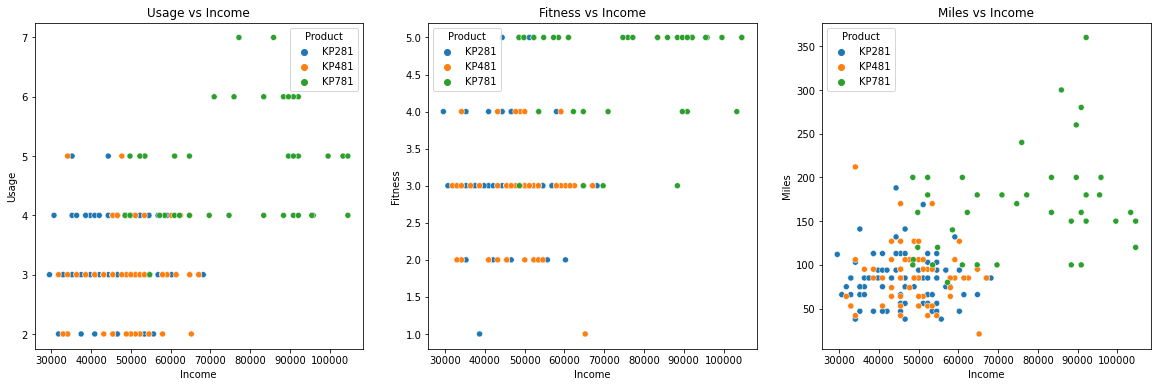
4. Since we have observed that female customers are very few for the KP781, some incentives/discounts may be given to females to create a new demand among them.
5. Aerofit can also try to create a few ad campaigns where there promote the benefits of getting fit and also show some weight loss journeys of their customers using their treadmills.
    - This will help expand into the untapped market of those customers who lack fitness awareness.

# **Some important observations:**

**1. Top-3 features that have highest correleation with the Product column? Also provide possible reasons behind those correlations?**

- The top-3 features which affect the choice of a product (clearly visible from the KDE plot of these features across Product):
    - Income
    - Fitness
    - Usage/Miles
- ***Why Income?***
    - Income is quite obvious, since any purchase a customer makes is dependent of his/her income
    - For example KP781 is an expensive treadmill and is only bought by those whose annual income is high
- ***Why Fitness?***
    - We must understand that the products in question are fitness products
    - Fitness is a strong factor which determines the choice of products
    - We have observed that those customers who are already very fit bought the premium KP781 treadmill while those with poor or average fitness go for the low-end treadmills
- ***Why usage/miles?***
    - This is also quite straight forward. When a customer has a high or daily usage for a product, he/she usually wants to invest in something that is long lasting, and has as many features as possiblr. If the use case is less, then usually people will not spend a lot on a product.
    - We have also seen that if the expected usage/miles of the customer is high, he/she tends to opt for the KP781 (given that his income allows him to so so)
    - For those customers who have bought KP281 and KP481, their overall usage and miles are low
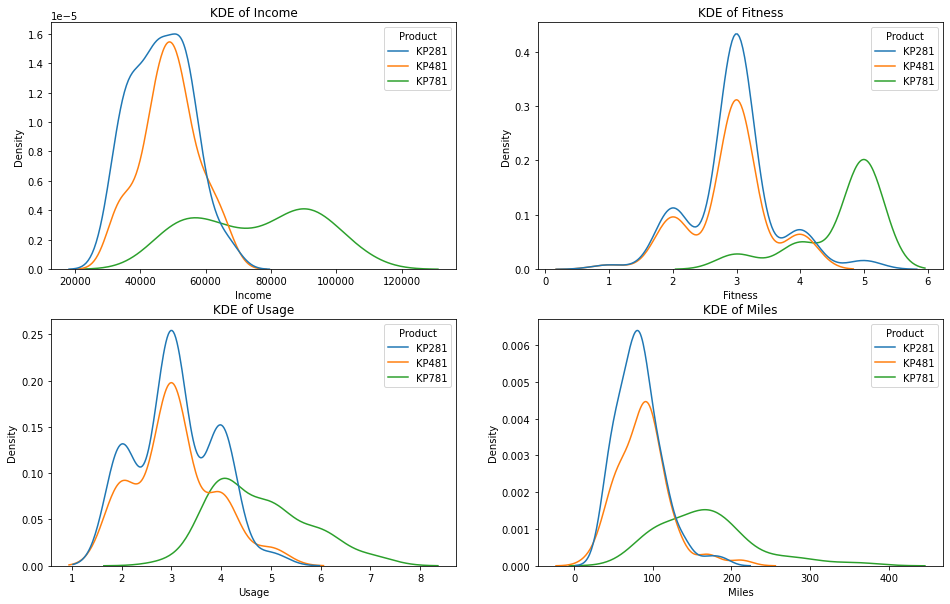

**2. How did we identify and treat the outliers in the dataset?**

- Outliers were identified(by the 1.5 * IQR rule) and treated
- All the data points which were above/below the upper/lower whisker were assigned the value of the whisker itself

**3. Marital Status implies no significant information on the usage of different treadmills. (T/F)**

- This statement is True
- AS far as the usage of the treadmills is concerned, Marital Status is not a feature that affects it
- This has been demonstrated in the below figure
- We can observe that the usage pattern for different treadmills roughlt remains the same irrespective of ther Marital Status

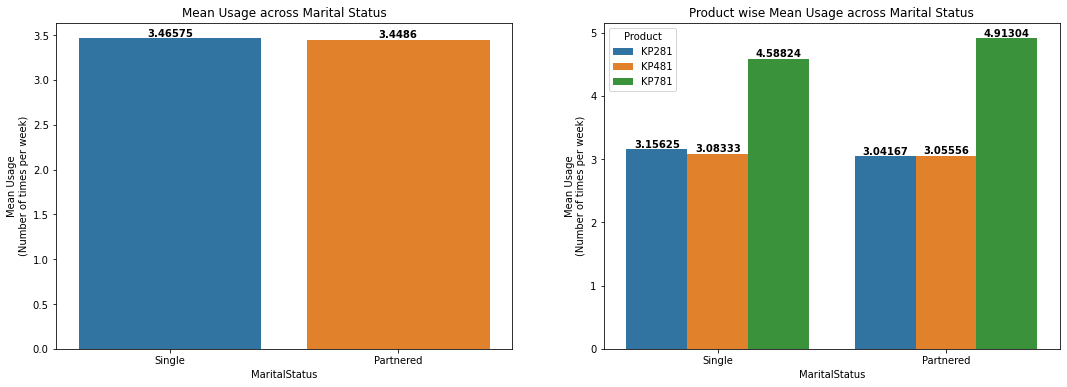

In [57]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
f = sns.barplot(x=df_original['MaritalStatus'], y=df_original['Usage'], estimator=np.mean, ci=None)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Mean Usage\n(Number of times per week)')
plt.title('Mean Usage across Marital Status')
plt.subplot(1, 2, 2)
f = sns.barplot(x=df_original['MaritalStatus'], y=df_original['Usage'], hue=df_original['Product'], estimator=np.mean, ci=None)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.ylabel('Mean Usage\n(Number of times per week)')
plt.title('Product wise Mean Usage across Marital Status')
plt.show()

**4. The variance of income in lower ages is smaller as compared to the variance in higher ages**

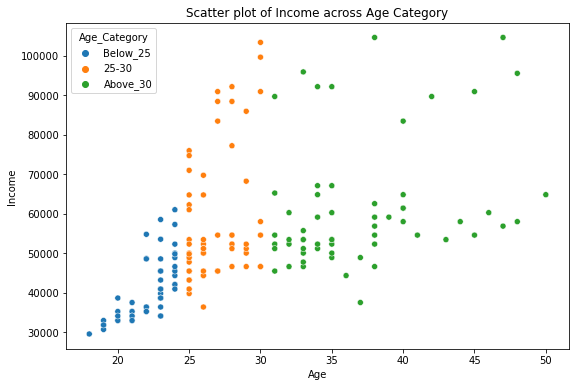

In [58]:
plt.figure(figsize=(9, 6))
# sns.kdeplot(x=pd.concat([df_original, df_profile['Age_Category']], axis=1)['Income'], hue=pd.concat([df_original, df_profile['Age_Category']], axis=1)['Age_Category'])
sns.scatterplot(x=pd.concat([df_original, df_profile['Age_Category']], axis=1)['Age'], y=pd.concat([df_original, df_profile['Age_Category']], axis=1)['Income'], 
                hue=pd.concat([df_original, df_profile['Age_Category']], axis=1)['Age_Category'])
plt.title('Scatter plot of Income across Age Category')
plt.show()

In [59]:
pd.pivot(data=pd.concat([df_original, df_profile['Age_Category']], axis=1)[['Age', 'Age_Category']], columns='Age_Category', values='Age').describe()

Age_Category,Below_25,25-30,Above_30
count,54.000000,66.00000,60.000000
mean,22.166667,26.69697,37.050000
std,1.645463,1.76260,5.097108
min,18.000000,25.00000,31.000000
25%,21.000000,25.00000,33.000000
50%,23.000000,26.00000,35.000000
75%,23.000000,28.00000,40.000000
max,24.000000,30.00000,50.000000


In [60]:
# Variance of Income of different age groups:
(pd.pivot(data=pd.concat([df_original, df_profile['Age_Category']], axis=1)[['Age', 'Age_Category']], 
         columns='Age_Category', values='Age').describe().loc['std'].values)**2

array([ 2.70754717,  3.10675991, 25.98050847])

*Variance of income for different age groups are as follows:*
- Below_25: 2.7
- 25-30: 3.1
- Above 30: 25.98
- In statistics, this is called: 'Heteroscedasticity'

**5. What proportion of women have bought the KP781 treadmill? What can be the possible reasons for this?**

- KP781 was bought by a total of 40 customers (33 Male and 7 female).
- Thus only 17.5% customers who bought this product were females.
- We know that the customers who have bought KP781 have high:
    - Income
    - Fitness
    - Usage
    - Miles
- Now, we try to see how the above features differ across Gender from the plots below:
    - We can observe that Median value of Income, Usage and Miles are all greater for Males than Females while on fitness, both are the same.
    - Thus this gives us an idea as to why so few women have bought the KP7841 treadmill.

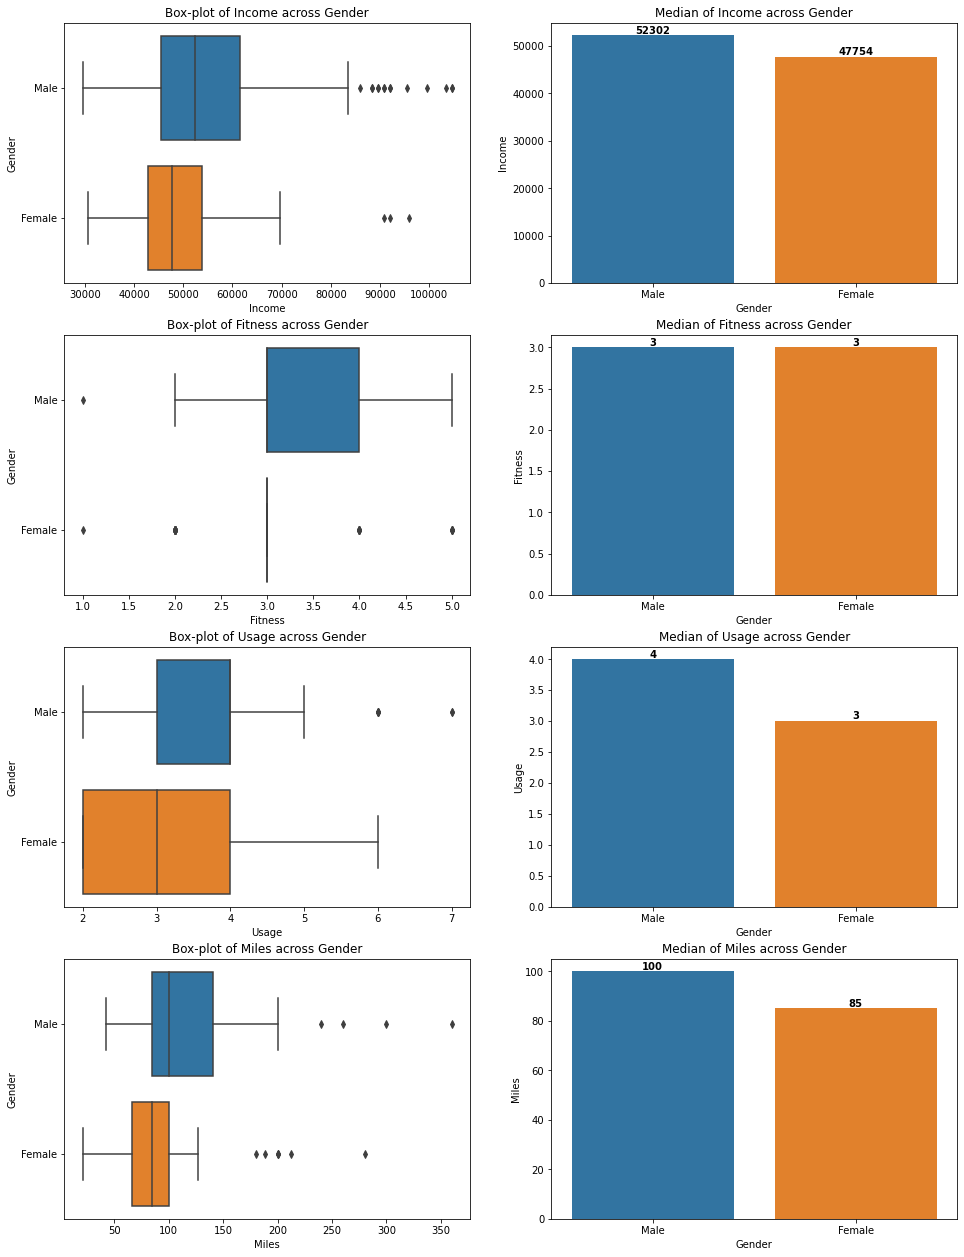

In [61]:
kp781_features = ['Income', 'Fitness', 'Usage', 'Miles']
fig = plt.figure(figsize=(16, 22))
id = 1
for feature in kp781_features:
    plt.subplot(4, 2, id)
    sns.boxplot(x=df_original[feature], y=df_original['Gender'])
    plt.title(f'Box-plot of {feature} across Gender')
    plt.subplot(4, 2, id+1)
    f = sns.barplot(data=df_original, x='Gender', y=feature, estimator=np.median, ci=None)
    for item in f.containers:
        f.bar_label(item, fontsize=10, fontweight='bold')
    plt.title(f'Median of {feature} across Gender')
    id += 2